In [3]:
!pip install scikit-survival

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 102.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.1/222.1 kB 20.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


## Dados de treinamento

In [4]:
import json

sample_json_data = '''
[
  {
    "id_cliente": 1,
    "prazo_emprestimo_meses": 10,
    "evento_inadimplencia": 0,
    "valor_parcela": 500.00,
    "possui_garantia": 1,
    "score_credito_baixo": 0
  },
  {
    "id_cliente": 2,
    "prazo_emprestimo_meses": 15,
    "evento_inadimplencia": 1,
    "valor_parcela": 750.00,
    "possui_garantia": 0,
    "score_credito_baixo": 1
  },
  {
    "id_cliente": 3,
    "prazo_emprestimo_meses": 20,
    "evento_inadimplencia": 0,
    "valor_parcela": 1000.00,
    "possui_garantia": 1,
    "score_credito_baixo": 0
  },
  {
    "id_cliente": 4,
    "prazo_emprestimo_meses": 5,
    "evento_inadimplencia": 1,
    "valor_parcela": 300.00,
    "possui_garantia": 0,
    "score_credito_baixo": 1
  },
  {
    "id_cliente": 5,
    "prazo_emprestimo_meses": 25,
    "evento_inadimplencia": 0,
    "valor_parcela": 1200.00,
    "possui_garantia": 1,
    "score_credito_baixo": 0
  }
]
'''

print("Dados JSON de exemplo criados.")

Dados JSON de exemplo criados.


In [5]:
import pandas as pd
from io import StringIO

# Carrega os dados JSON na memória como um DataFrame
df_from_json = pd.read_json(StringIO(sample_json_data))

# Converte o DataFrame para uma string CSV
csv_output = df_from_json.to_csv(index=False)

print("CSV gerado a partir do JSON:")
print(csv_output)

# Opcional: Salvar em um arquivo local para download automático
from google.colab import files
with open('dados_para_modelo.csv', 'w') as f:
    f.write(csv_output)
files.download('dados_para_modelo.csv')

print("\nVocê pode copiar o texto acima e salvar como um arquivo .csv, ou fazer o download se a linha comentada for descomentada.")

CSV gerado a partir do JSON:
id_cliente,prazo_emprestimo_meses,evento_inadimplencia,valor_parcela,possui_garantia,score_credito_baixo
1,10,0,500,1,0
2,15,1,750,0,1
3,20,0,1000,1,0
4,5,1,300,0,1
5,25,0,1200,1,0



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Você pode copiar o texto acima e salvar como um arquivo .csv, ou fazer o download se a linha comentada for descomentada.


Para usar este CSV com o seu algoritmo:

1.  **Copie o texto CSV** que foi gerado na saída da célula anterior.
2.  **Cole o texto** em um novo arquivo de texto e salve-o com a extensão `.csv` (ex: `meus_dados.csv`).
3.  **Execute novamente a célula principal do seu modelo (`sUzG_PyOLfQ2`)**.
4.  Quando for solicitado o upload, **faça o upload** do arquivo CSV que você acabou de criar.

Certifique-se de que os nomes das colunas (`prazo_emprestimo_meses`, `evento_inadimplencia`, `valor_parcela`, `possui_garantia`, `score_credito_baixo`) estejam corretos e correspondam aos que seu algoritmo espera.

## Algoritimo de classificação

Bibliotecas importadas com sucesso.
csv


Saving dados_para_modelo.csv to dados_para_modelo (2).csv
Arquivo 'dados_para_modelo (2).csv' carregado.
Dataset carregado com sucesso. Amostra:
   id_cliente  prazo_emprestimo_meses  evento_inadimplencia  valor_parcela  \
0           1                      10                     0            500   
1           2                      15                     1            750   
2           3                      20                     0           1000   
3           4                       5                     1            300   
4           5                      25                     0           1200   

   possui_garantia  score_credito_baixo  
0                1                    0  
1                0                    1  
2                1                    0  
3                0                    1  
4                1                    0  

Preparando dados para modelagem...
Dados prontos: 3 amostras de treino, 2 amostras de teste.
Iniciando o treinamento do modelo RFS...

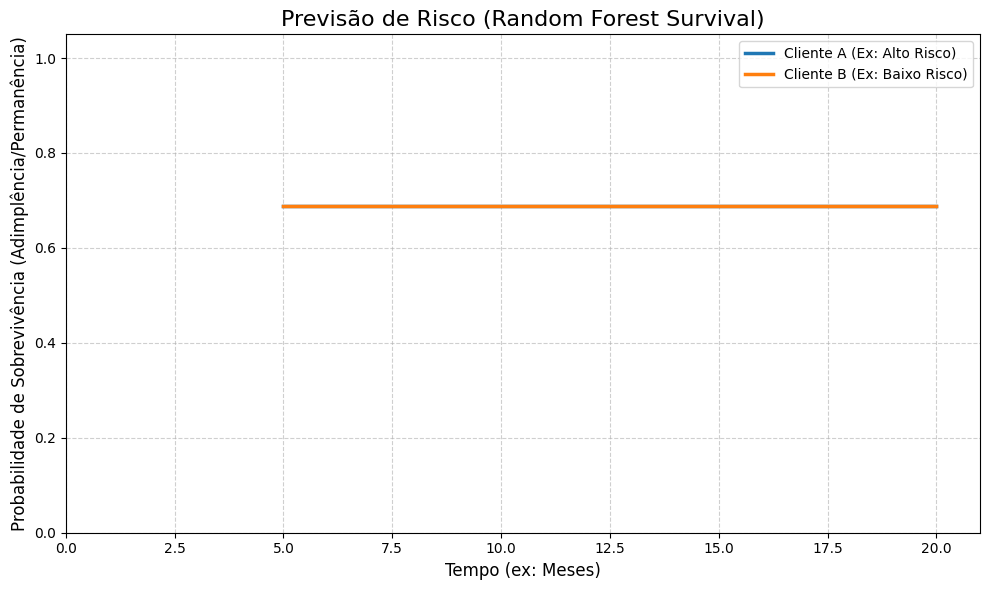


Preparando gráfico PNG (Performance AUC)...

Não foi possível gerar o gráfico da AUC (dados de métrica indisponíveis).

Iniciando downloads dos arquivos PNG...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloads concluídos.

Análise concluída.


In [7]:

# --- 1. Importando as Bibliotecas Necessárias ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time # Para medir o tempo

# Importa bibliotecas de download
from google.colab import files  # Para download no Colab

# Bibliotecas scikit-survival
from sksurv.ensemble import RandomSurvivalForest
from sksurv.util import Surv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sksurv.metrics import brier_score, cumulative_dynamic_auc

print("Bibliotecas importadas com sucesso.")

# --- 2. Dataset ---

print("csv")
uploaded_files = files.upload() # Store the result of files.upload() in a variable
NOME_ARQUIVO_UPLOAD = list(uploaded_files.keys())[0] # Use the variable to get the filename
print(f"Arquivo '{NOME_ARQUIVO_UPLOAD}' carregado.")

# Carrega o arquivo em um DataFrame
# Se for Excel, use pd.read_excel(NOME_ARQUIVO_UPLOAD)
try:
    df_raw = pd.read_csv(NOME_ARQUIVO_UPLOAD)
except UnicodeDecodeError:
    print("Falha ao ler como UTF-8, tentando 'latin1'...")
    df_raw = pd.read_csv(NOME_ARQUIVO_UPLOAD, encoding='latin1')
except Exception as e:
    print(f"Não foi possível ler o CSV. Se for um Excel, mude para pd.read_excel(). Erro: {e}")

print("Dataset carregado com sucesso. Amostra:")
print(df_raw.head())


# 1. Coloque o nome da coluna que indica o TEMPO
NOME_COLUNA_TEMPO = 'prazo_emprestimo_meses'

# 2. Coloque o nome da coluna que indica o EVENTO
# Esta coluna deve ser 1 (ou True) se o evento ocorreu, e 0 (ou False) se foi censurado.
NOME_COLUNA_EVENTO = 'evento_inadimplencia'

# 3. Coloque os nomes das colunas que você quer usar como FEATURES (preditores)
LISTA_COLUNAS_FEATURES = [
    'valor_parcela',
    'possui_garantia',
    'score_credito_baixo'
    # Adicione mais colunas do seu dataset aqui
]

# 4. Em meses
TEMPOS_DE_AVALIACAO = np.array([12.0, 24.0, 36.0])
#################################################################

# --- Preparando os dados para o scikit-survival ---
print("\nPreparando dados para modelagem...")

# Criando X (Features)
# Seleciona apenas as colunas de features e lida com valores faltantes (preenchendo com a média)
X_features = df_raw[LISTA_COLUNAS_FEATURES].fillna(df_raw[LISTA_COLUNAS_FEATURES].mean())

# Criando Y (Target de Sobrevivência)
# Garante que a coluna de evento seja booleana
evento_bool = df_raw[NOME_COLUNA_EVENTO].astype(bool)
tempo_float = df_raw[NOME_COLUNA_TEMPO].astype(float)
Y_target = Surv.from_arrays(event=evento_bool, time=tempo_float)

# Normalização das features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

# Divisão em Treino e Teste
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y_target, test_size=0.25, random_state=42
)
print(f"Dados prontos: {X_train.shape[0]} amostras de treino, {X_test.shape[0]} amostras de teste.")


# --- 3. Configurando e Treinando o Modelo RFS ---
rfs_model = RandomSurvivalForest(n_estimators=250,
                                 min_samples_split=10,
                                 min_samples_leaf=15,
                                 max_features="sqrt",
                                 n_jobs=-1,
                                 random_state=42)

print("Iniciando o treinamento do modelo RFS...")
start_time = time.time()
rfs_model.fit(X_train, Y_train)
end_time = time.time()
print(f"Modelo treinado com sucesso em {end_time - start_time:.2f} segundos.")

# --- 4. Avaliando o Desempenho e Erro do Modelo ---

print("\n--- Avaliação de Desempenho do Modelo ---")

# --- Métrica 1: C-Index (Concordance Index) ---
c_index = rfs_model.score(X_test, Y_test)
print(f"Avaliação de Precisão (C-Index) no teste: {c_index:.4f}")

# --- Preparando predições para as próximas métricas ---
risk_scores_test = rfs_model.predict(X_test)
surv_funcs_test = rfs_model.predict_survival_function(X_test) # Lista de StepFunctions

# Definindo tempos de avaliação e filtrando dados de teste
max_obs_time_treino = Y_train["time"].max()

test_mask = Y_test["time"] < max_obs_time_treino
Y_test_filtered = Y_test[test_mask]
risk_scores_test_filtered = risk_scores_test[test_mask]
surv_funcs_test_filtered = surv_funcs_test[test_mask]

auc_data = None
scores_brier = None

if len(Y_test_filtered) == 0:
    print("Aviso: Nenhum dado de teste restante após a filtragem. Não é possível calcular métricas de Brier Score e AUC.")
elif Y_test_filtered["time"].min() >= Y_test_filtered["time"].max():
    print(f"Aviso: O intervalo de tempo dos dados de teste filtrados é muito pequeno ou contém apenas um ponto: [{Y_test_filtered['time'].min()}; {Y_test_filtered['time'].max()}[. Não é possível calcular métricas de Brier Score e AUC que requerem um intervalo válido.")
else:
    min_test_obs_time = Y_test_filtered["time"].min()
    max_test_obs_time = Y_test_filtered["time"].max()

    # Filtra TEMPOS_DE_AVALIACAO para estar estritamente dentro dos tempos de teste observados
    valid_tempos_para_metricas = [
        t for t in TEMPOS_DE_AVALIACAO
        if t >= min_test_obs_time and t < max_test_obs_time
    ]
    tempos_para_metricas = np.array(valid_tempos_para_metricas)

    if len(tempos_para_metricas) == 0:
        print(f"Aviso: Nenhuma dos tempos de avaliação {TEMPOS_DE_AVALIACAO} está dentro do range válido dos dados de teste filtrados ({min_test_obs_time} a {max_test_obs_time}). Não é possível calcular métricas de Brier Score e AUC.")
    else:
        # Avalia as StepFunctions nos tempos específicos para obter um array numérico
        probs_for_brier = np.array([func(tempos_para_metricas) for func in surv_funcs_test_filtered])

        # --- Métrica 2: Escore de Brier (Erro de Predição) ---
        scores_brier_raw_tuple = brier_score(Y_train, Y_test_filtered, probs_for_brier, tempos_para_metricas)
        scores_brier = scores_brier_raw_tuple[1].flatten()

        print("\nEscore de Brier (Erro de Predição):")
        for t, score in zip(tempos_para_metricas, scores_brier):
            print(f"  - Em {t} unidades de tempo: {score:.4f} (Quanto menor, melhor)")

        # --- Métrica 3: AUC Cumulativa e Dinâmica (Desempenho de Classificação) ---
        auc_data = cumulative_dynamic_auc(Y_train, Y_test_filtered, risk_scores_test_filtered, tempos_para_metricas)
        mean_auc = auc_data[1]
        print(f"\nAUC Média Cumulativa/Dinâmica: {mean_auc:.4f} (Quanto maior, melhor)")

# --- 5. Gerando Gráfico PNG (Curva de Sobrevivência) ---

print("\nPreparando gráfico PNG (Curva de Sobrevivência)...")
NOME_ARQUIVO_SOBREVIVENCIA_PNG = 'RFS_Previsao_Sobrevivencia_HiRes.png'

# Selecionando 2 clientes do conjunto de teste para comparar
num_curves_to_plot = min(len(surv_funcs_test), 2)
curvas_sobrevivencia_funcs_anim = surv_funcs_test[:num_curves_to_plot]

fig_sobrev = None # Inicializa a figura como None

if num_curves_to_plot > 0:
    tempos_plot_sobrev = curvas_sobrevivencia_funcs_anim[0].x
    curvas_para_plotar = np.array([func.y for func in curvas_sobrevivencia_funcs_anim])

    # --- Configuração do Plot ---
    fig_sobrev, ax_sobrev = plt.subplots(figsize=(10, 6))
    ax_sobrev.set_title("Previsão de Risco (Random Forest Survival)", fontsize=16)
    ax_sobrev.set_xlabel("Tempo (ex: Meses)", fontsize=12)
    ax_sobrev.set_ylabel("Probabilidade de Sobrevivência (Adimplência/Permanência)", fontsize=12)
    ax_sobrev.set_ylim(0, 1.05)
    ax_sobrev.set_xlim(0, max(tempos_plot_sobrev) + 1)
    ax_sobrev.grid(True, linestyle='--', alpha=0.6)

    # Plota as curvas disponíveis
    if num_curves_to_plot >= 1:
        ax_sobrev.plot(tempos_plot_sobrev, curvas_para_plotar[0, :], lw=2.5, label='Cliente A (Ex: Alto Risco)')
    if num_curves_to_plot >= 2:
        ax_sobrev.plot(tempos_plot_sobrev, curvas_para_plotar[1, :], lw=2.5, label='Cliente B (Ex: Baixo Risco)')

    ax_sobrev.legend(loc='upper right')
    fig_sobrev.tight_layout()

    # --- 6. Salvando o PNG (Curva de Sobrevivência) ---
    print(f"Salvando gráfico (Sobrevivência) como '{NOME_ARQUIVO_SOBREVIVENCIA_PNG}'...")
    fig_sobrev.savefig(NOME_ARQUIVO_SOBREVIVENCIA_PNG, dpi=300) # dpi=300
    plt.show() # Display the plot in the notebook

else:
    print("Aviso: Não há curvas de sobrevivência suficientes para plotar o gráfico de sobrevivência.")


# --- 7. Gerando Gráfico PNG (Performance da AUC) ---
NOME_ARQUIVO_AUC_PNG = 'RFS_AUC_Performance_HiRes.png'
print(f"\nPreparando gráfico PNG (Performance AUC)...")

if auc_data is not None:
    # Pega os dados da AUC calculados na Seção 4
    auc_scores = auc_data[0]
    mean_auc = auc_data[1]

    # --- 8. Configuração do Plot para o Gráfico da AUC ---
    fig_auc, ax_auc = plt.subplots(figsize=(10, 6))
    ax_auc.set_title("Performance do Modelo (AUC) ao Longo do Tempo", fontsize=16)
    ax_auc.set_xlabel("Tempo (ex: Meses)", fontsize=12)
    ax_auc.set_ylabel("AUC Score", fontsize=12)
    ax_auc.set_ylim(0.5, 1.0) # AUC > 0.5
    ax_auc.set_xlim(0, max(tempos_para_metricas) + 1)
    ax_auc.grid(True, linestyle='--', alpha=0.6)

    # Plota os dados completos
    ax_auc.plot(tempos_para_metricas, auc_scores, lw=2.5, marker='o', label='AUC Cumulativa/Dinâmica')
    ax_auc.axhline(mean_auc, color='red', linestyle='--', lw=2, label=f'AUC Média: {mean_auc:.4f}')

    ax_auc.legend(loc='lower right')
    fig_auc.tight_layout()

    # --- 9. Salvando o PNG (AUC) ---
    print(f"Salvando gráfico (AUC) como '{NOME_ARQUIVO_AUC_PNG}'...")
    fig_auc.savefig(NOME_ARQUIVO_AUC_PNG, dpi=300) # dpi=300
    plt.show() # Display the plot in the notebook

else:
    print("\nNão foi possível gerar o gráfico da AUC (dados de métrica indisponíveis).")


# --- 10. Baixando os Arquivos Gerados no Navegador ---
try:
    print("\nIniciando downloads dos arquivos PNG...")
    if fig_sobrev is not None: # Verifica se a figura foi criada antes de tentar baixar
        files.download(NOME_ARQUIVO_SOBREVIVENCIA_PNG)
    if auc_data is not None:
        files.download(NOME_ARQUIVO_AUC_PNG)
    print("Downloads concluídos.")
except Exception as e:
    print(f"Falha no download automático (talvez não esteja no Colab?): {e}")

print("\nAnálise concluída.")